# LINEAR REGRESSIO MEDICAL INSURANCE PROJECT

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model training
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

In [3]:
#To predict charges for medical insurance

## Data Gathering

In [4]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory data analysis

### sex column

In [7]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [8]:
df['sex'].replace({'female':0, 'male':1}, inplace=True)

In [9]:
sex_value = {'female':0, 'male':1}
sex_value

{'female': 0, 'male': 1}

In [10]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

### smoker column

In [11]:
df['smoker'].replace({"yes":0, "no":1}, inplace=True)

In [12]:
smoker_value = {"yes":0, "no":1}
smoker_value

{'yes': 0, 'no': 1}

In [13]:
df['smoker'].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


### region column

In [15]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [18]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [20]:
df = df.select_dtypes(exclude=object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Feature Engineering

### outlier handling

In [21]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

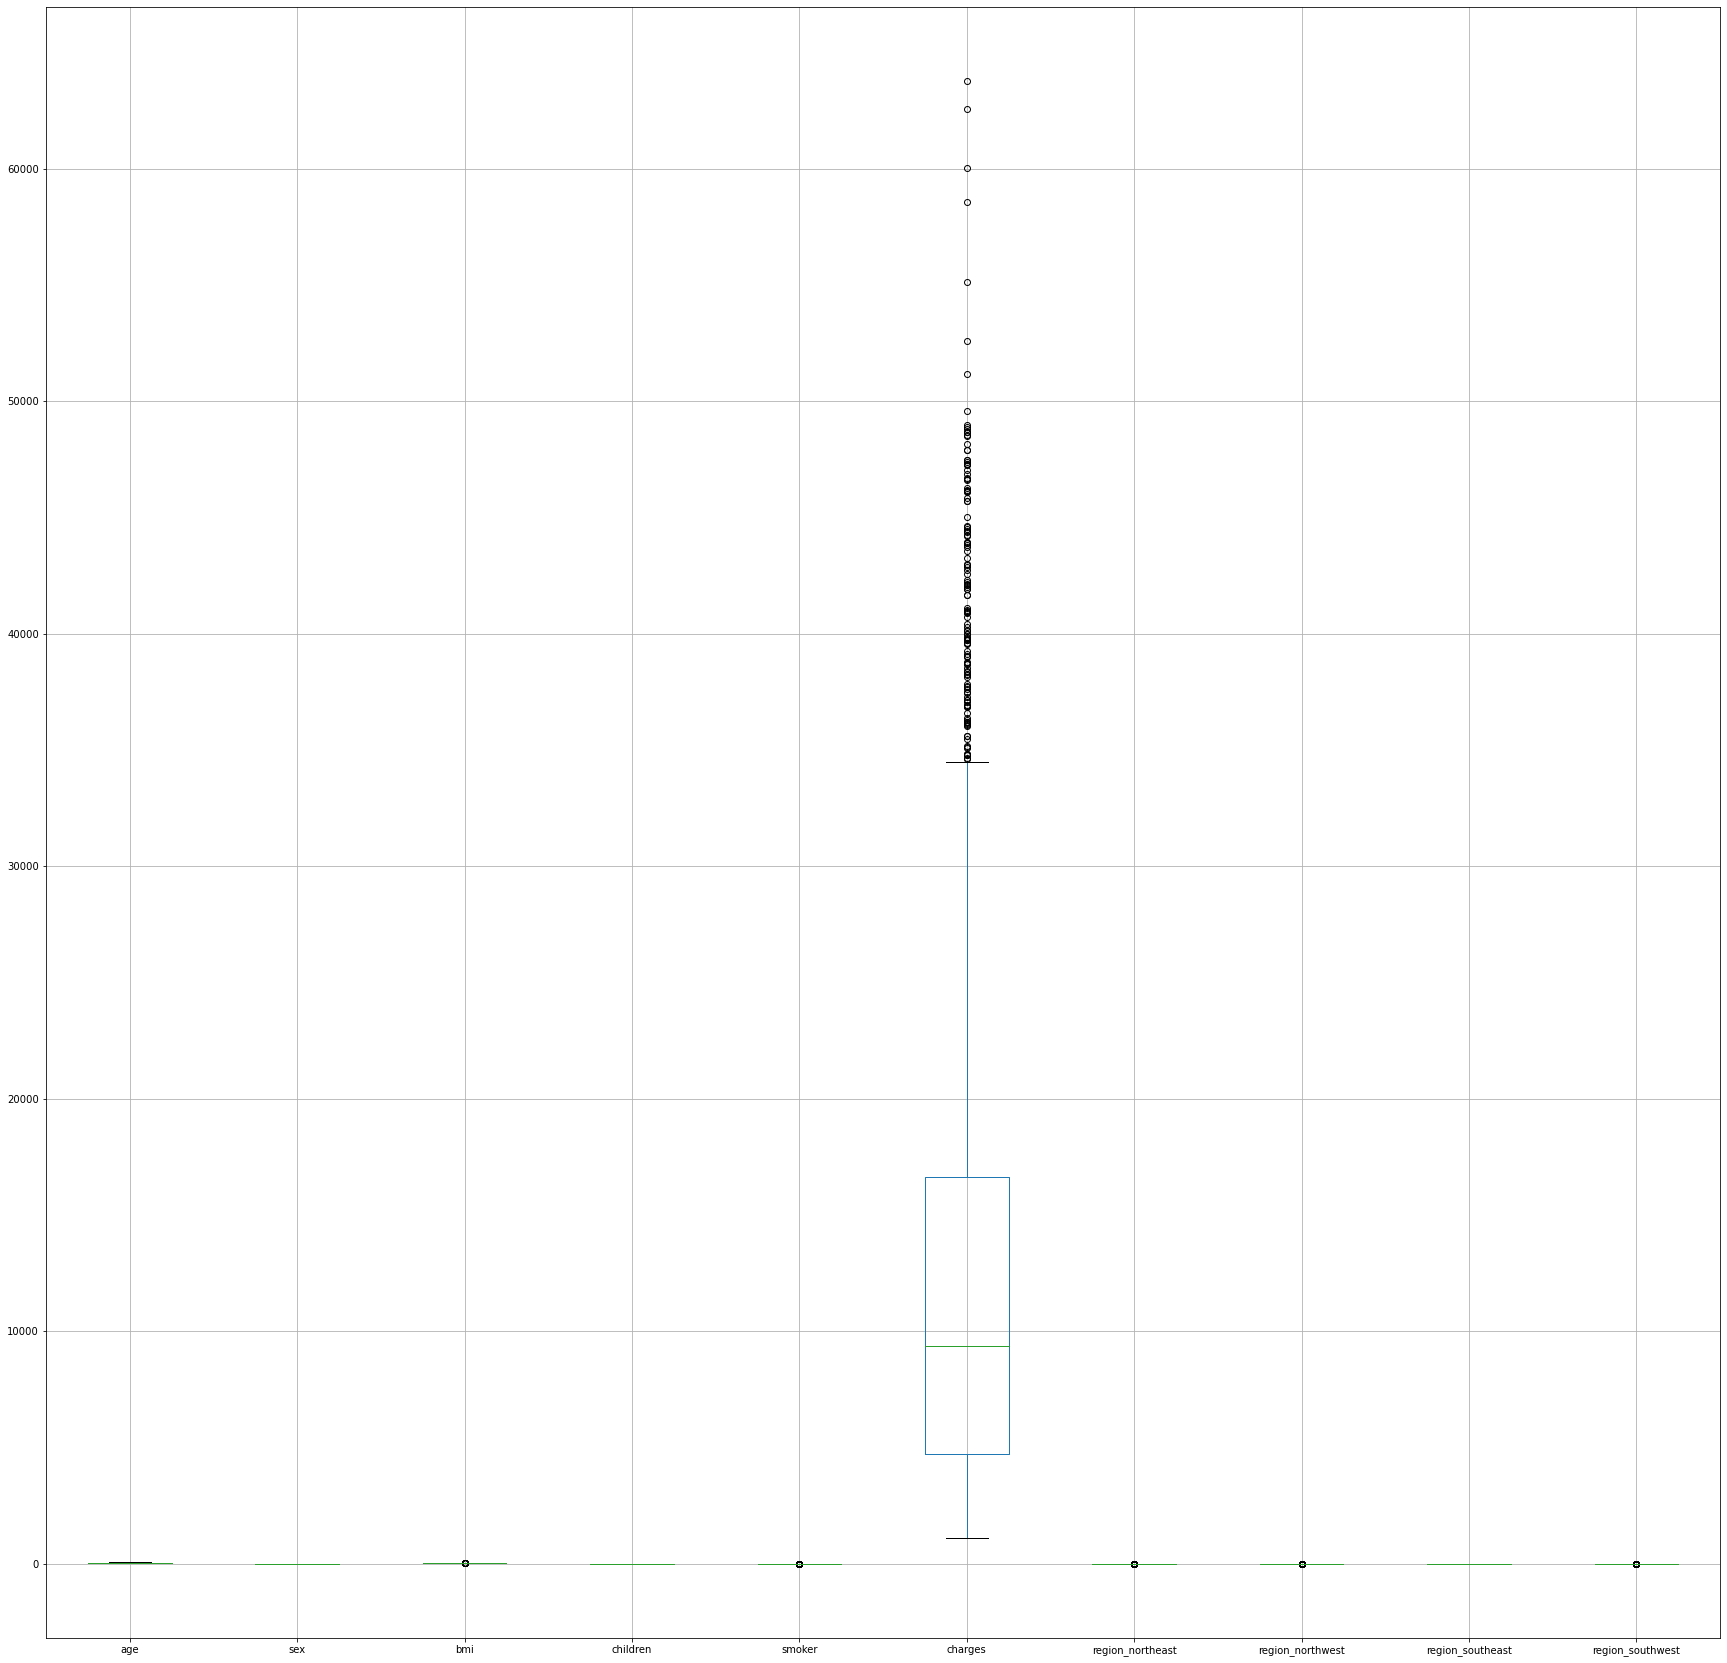

In [22]:
plt.figure(figsize=(30,30))
df.boxplot()

### bmi

<AxesSubplot:>

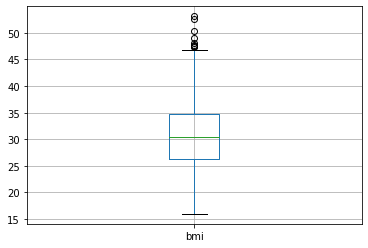

In [23]:
df[['bmi']].boxplot()

In [24]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
median = df['bmi'].median()
mean= df['bmi'].mean()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("mean : ",mean)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
Median : 30.4
mean :  30.663396860986538
upper_tail : 47.290000000000006
lower_tail : 13.7


In [25]:
df[['bmi']].loc[df['bmi'] > upper_tail]

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [26]:
df[['bmi']].loc[df['bmi'] < lower_tail]

,bmi


In [27]:
median = df[['bmi']].loc[(df['bmi'] < upper_tail) & (df['bmi'] > lower_tail)].median()[0]
median

30.3

In [28]:
df.loc[(df['bmi'] > upper_tail) | (df['bmi'] < lower_tail), 'bmi'] = median


<AxesSubplot:xlabel='bmi'>

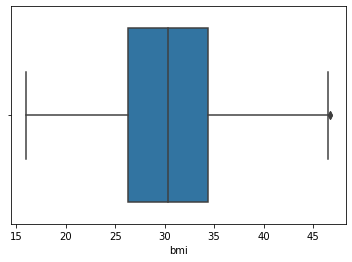

In [29]:
sns.boxplot(x = df['bmi'])

In [30]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.535751,1.094918,0.795217,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,5.900020,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.300000,1.000000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.430000,2.000000,1.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,46.750000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


# model training

In [31]:
df = df.select_dtypes(exclude=object)

x = df.drop("charges", axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=25)

In [32]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
629,44,0,38.950,0,0,0,1,0,0
556,46,1,33.440,1,1,1,0,0,0
427,18,0,29.165,0,1,1,0,0,0
1047,22,1,30.300,1,0,0,0,1,0
98,56,1,19.950,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
886,57,1,28.975,0,0,1,0,0,0
143,29,1,29.735,2,1,0,1,0,0
474,54,1,25.100,3,0,0,0,0,1
318,44,0,27.645,0,1,0,1,0,0


# Model Training

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [34]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 34376163.193553284
RMSE : 5863.118896419659
MAE : 4265.1886033712235
R Squared : 0.756524952965904


In [35]:
# training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 37435130.12652114
RMSE : 6118.425461384746
MAE : 4185.360243017108
R Squared : 0.746831421115133


# Testing on Single Row

In [36]:
column_names = x.columns
len(column_names)

9

In [37]:
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [38]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [39]:
age = 67
sex = "male"
bmi = 27.9
children = 3
smoker = "yes"
region = "southeast"


In [40]:
print(sex_value)
print(smoker_value)
print(column_names)

{'female': 0, 'male': 1}
{'yes': 0, 'no': 1}
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [41]:
project_data = {"sex":sex_value, "smoker":smoker_value, "columns":list(column_names)}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [42]:
project_data['smoker'][smoker]

0

In [43]:
# Column name
region = "region_" + region
region

'region_southeast'

In [44]:
region_index = np.where(column_names == region)[0][0]
region_index

7

In [45]:
array = np.zeros(x.shape[1])
array[0] = age
array[1] = project_data['sex'][sex]
array[2] = bmi
array[3] = children
array[4] = project_data['smoker'][smoker]
array[region_index] = 1


In [46]:
model.predict([array])[0]

39203.75590585304

In [47]:
import pickle

with open("Linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [48]:
import json

with open("project_data.json", "w") as f:
    json.dump(project_data, f)

In [51]:
json_data={'sex':{'female':0,'male':1},
           'smoker':{'yes':0,'no':1},
           'columns':['age',
                      'sex',
                      'bmi',
                      'children',
                      'smoker',
                      'region_northeaast',
                      'region_northwest',
                      'region_southeast',
                      'region_southwest']}
len(json_data['columns'])

9